In [1]:
import sys
!{sys.executable} -m pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 24.3 MB/s eta 0:00:00


In [2]:
import sys
!{sys.executable} -m pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 3.1 MB/s eta 0:00:00


In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
# import seaborn as sns
# sns.set()
mpl.rcParams["figure.figsize"] = (10, 10)
mpl.rcParams["axes.grid"] = False
mpl.rcParams["font.size"] = 16

In [4]:
import numpy as np

In [5]:
X_train = np.load('/home/idies/workspace/Storage/s.hossain18/Permanent/PCA_Robust/X_train_pca.npy')
X_test = np.load('/home/idies/workspace/Storage/s.hossain18/Permanent/PCA_Robust/X_test_pca.npy')
y_train = np.load('/home/idies/workspace/Storage/s.hossain18/Permanent/PCA_Robust/y_train.npy')
y_test = np.load('/home/idies/workspace/Storage/s.hossain18/Permanent/PCA_Robust/y_test.npy')

In [6]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=41)

In [7]:
import xgboost as xgb

In [8]:
# Create an instance of the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(colsample_bytree=0.8840923286188427,learning_rate=0.02136758382220562,max_depth=10,n_estimators=426,reg_alpha=0,reg_lambda=1,subsample=0.8834671223572841,random_state=43,n_jobs=-1)

In [9]:
xgb_classifier.fit(X_train, np.ravel(y_train))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8840923286188427, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02136758382220562,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=426, n_jobs=-1,
              num_parallel_tree=None, random_state=43, ...)

In [10]:
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss

In [11]:
# Probability estimate
prob_pos = xgb_classifier.predict_proba(X_test)[:, 1]
# Brier Score
b_score = brier_score_loss(y_test, prob_pos)
print("Brier Score :",b_score)

Brier Score : 0.1275840810650671


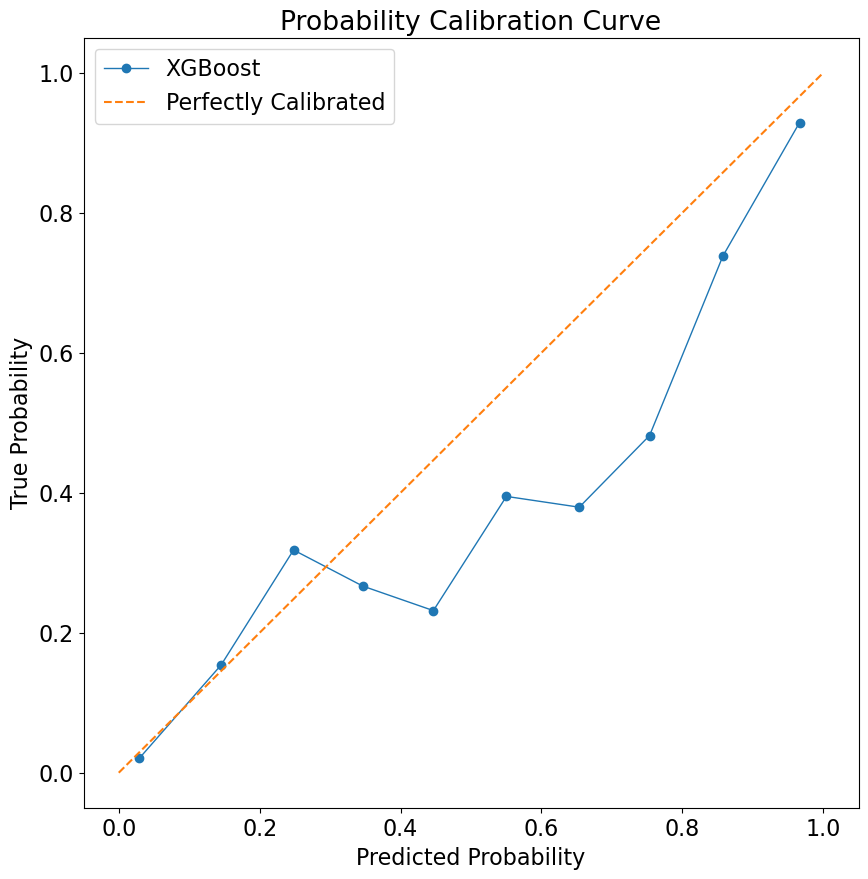

In [12]:
# True and Predicted Probabilities
true_pos, pred_pos = calibration_curve(y_test, prob_pos, n_bins=10)

#Plot the Probabilities Calibrated curve
plt.plot(pred_pos,
         true_pos,
         marker='o',
         linewidth=1,
         label='XGBoost')

#Plot the Perfectly Calibrated by Adding the 45-degree line to the plot
plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         label='Perfectly Calibrated')


# Set the title and axis labels for the plot
plt.title('Probability Calibration Curve')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')

# Add a legend to the plot
plt.legend(loc='best')

# Show the plot
plt.show()

In [13]:
from sklearn.calibration import CalibratedClassifierCV

In [14]:
xgb_classifier_calib = CalibratedClassifierCV(xgb_classifier,method='isotonic',cv=5,n_jobs=-1)

In [15]:
xgb_classifier_calib.fit(X_train, np.ravel(y_train))

CalibratedClassifierCV(cv=5,
                       estimator=XGBClassifier(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=0.8840923286188427,
                                               device=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric=None,
                                               feature_types=None, gamma=None,
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=0.02136758382220562,
                                               max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None,
                                               max_depth=10, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=426, n_jobs=-1,
                                               num_parallel_tree=None,
                                               random_state=43, ...),
                       method='isotonic', n_jobs=-1)

In [16]:
# Probability estimate after calibration
prob_pos_cal = xgb_classifier_calib.predict_proba(X_test)[:, 1]
# Brier Score
b_score = brier_score_loss(y_test, prob_pos_cal)
print("Brier Score :",b_score)

Brier Score : 0.1197102138109741


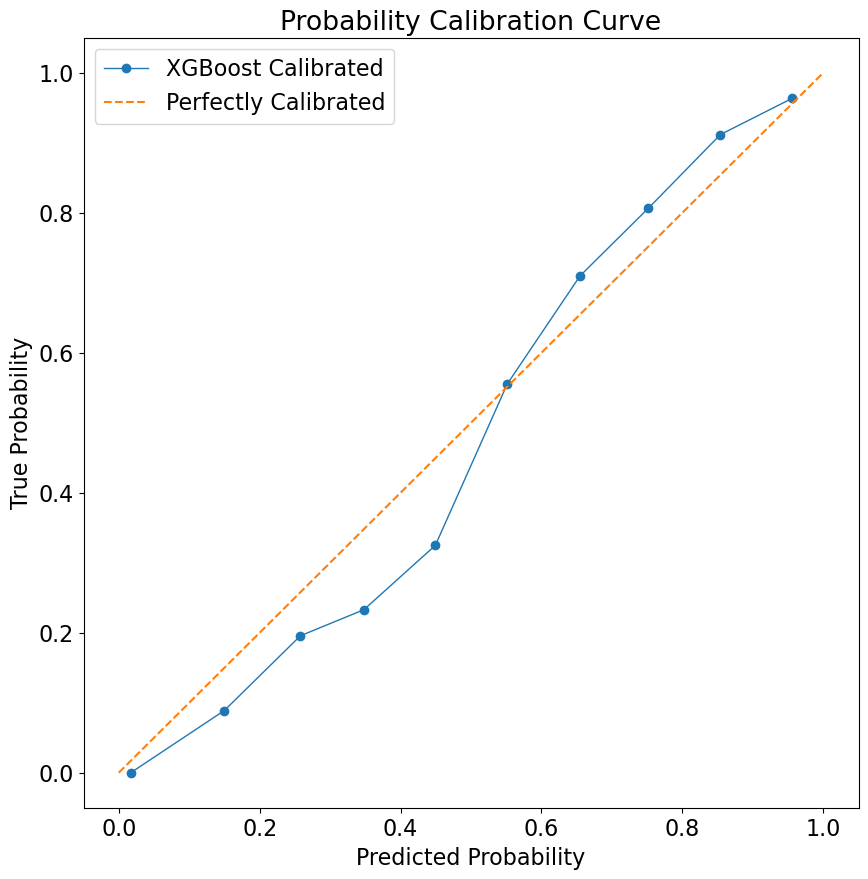

In [17]:
# True and Predicted Probabilities
true_pos, pred_pos = calibration_curve(y_test, prob_pos_cal, n_bins=10)

#Plot the Probabilities Calibrated curve
plt.plot(pred_pos,
         true_pos,
         marker='o',
         linewidth=1,
         label='XGBoost Calibrated')

#Plot the Perfectly Calibrated by Adding the 45-degree line to the plot
plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         label='Perfectly Calibrated')


# Set the title and axis labels for the plot
plt.title('Probability Calibration Curve')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')

# Add a legend to the plot
plt.legend(loc='best')

# Show the plot
plt.show()

In [18]:
X = np.vstack((X_train,X_test))
y = np.vstack((y_train,y_test))

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
from sklearn.metrics import precision_score, make_scorer

In [21]:
precision = make_scorer(precision_score,average='weighted')

In [22]:
scores_xgboost_precision = cross_val_score(xgb_classifier_calib,X,np.ravel(y),cv=cv,scoring=precision,n_jobs=-1)

/home/idies/mambaforge/envs/py39/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [23]:
print('XGBoost precision',scores_xgboost_precision.mean())

XGBoost precision 0.8926960890702723
